### Load libriers

In [1]:
from bs4 import BeautifulSoup 
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Requesting data from website**

In [2]:
from requests import get
url = 'https://www.goodreads.com/list/show/12362.All_Time_Favorite_Romance_Novels?page=1'
response = requests.get(url)
html = response.content
html_soup = BeautifulSoup(html, "html.parser")
book_containers = html_soup.find_all('tr',itemtype="http://schema.org/Book")
print(type(book_containers))
print(len(book_containers))

<class 'bs4.element.ResultSet'>
100


In [3]:
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [4]:
first_book = book_containers[0]
first_book

<tr itemscope="" itemtype="http://schema.org/Book">
<td class="number" valign="top">1</td>
<td valign="top" width="5%">
<div class="u-anchorTarget" id="1885"></div>
<div class="js-tooltipTrigger tooltipTrigger" data-resource-id="1885" data-resource-type="Book">
<a href="/book/show/1885.Pride_and_Prejudice" title="Pride and Prejudice">
<img alt="Pride and Prejudice" class="bookCover" itemprop="image" src="https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1320399351i/1885._SY75_.jpg"/>
</a> </div>
</td>
<td valign="top" width="100%">
<a class="bookTitle" href="/book/show/1885.Pride_and_Prejudice" itemprop="url">
<span aria-level="4" itemprop="name" role="heading">Pride and Prejudice</span>
</a> <br/>
<span class="by">by</span>
<span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
<div class="authorName__container">
<a class="authorName" href="https://www.goodreads.com/author/show/1265.Jane_Austen" itemprop="url"><span itemprop="name">Jane Austen</s

In [5]:
book_containers = html_soup.find_all('div', class_ ="elementList")
print(type(book_containers))
print(len(book_containers))

<class 'bs4.element.ResultSet'>
0


In [10]:
name = first_book.find('a',class_="bookTitle").text.strip()
authors = first_book.find('a',class_="authorName").text.strip()

scoring = first_book.find('span',class_="greyText smallText uitext").text.strip().split()
avg_scores=scoring[0]
rates = scoring[4]

voted= first_book.find('span',class_="smallText uitext").text.strip().split()
scores=voted[1]
vote=voted[3]




In [11]:
print("name:",name)
print("authors:",authors)
print("scoring:",scoring)
print("averae sores:",avg_scores)
print("ratings", rates)
print("scores:",scores)

print("votes:",vote)

name: Pride and Prejudice
authors: Jane Austen
scoring: ['4.28', 'avg', 'rating', '—', '3,891,470', 'ratings']
averae sores: 4.28
ratings 3,891,470
scores: 237,502,
votes: 2,403


In [8]:
page = 1
names = []
ratings = []
avgscores = []
author=[]
score=[]
votes=[]
while page != 51:
    url = f"https://www.goodreads.com/list/show/12362.All_Time_Favorite_Romance_Novels?page={page}"
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, "html.parser")
    book_containers = soup.find_all('tr', itemtype="http://schema.org/Book")
    for container in book_containers:
        if container.find('td', width= '100%') is not None:
            name = container.find('a',class_="bookTitle").text.strip()
            names.append(name)
            authors = container.find('a',class_="authorName").text.strip()
            author.append(authors)
            scoring = container.find('span',class_="greyText smallText uitext").text.strip().split()
            ascores=scoring[0]
            avgscores.append(ascores)
            rates = scoring[4]
            ratings.append(rates)
            voted= container.find('span',class_="smallText uitext").text.strip().split()        
            scores=voted[1]
            score.append(scores)
            vote=voted[3]
            votes.append(vote)
    page = page + 1

In [12]:
names

['Pride and Prejudice',
 'Fifty Shades of Grey (Fifty Shades, #1)',
 'Beautiful Disaster (Beautiful, #1)',
 'Twilight (The Twilight Saga, #1)',
 'The Notebook (The Notebook, #1)',
 'Perfect Chemistry (Perfect Chemistry, #1)',
 'Outlander (Outlander, #1)',
 'Jane Eyre',
 'Thoughtless (Thoughtless, #1)',
 'Bared to You (Crossfire, #1)',
 'Easy (Contours of the Heart, #1)',
 'Gone with the Wind',
 "Gabriel's Inferno (Gabriel's Inferno, #1)",
 "The Time Traveler's Wife",
 'Slammed (Slammed, #1)',
 'Anna and the French Kiss (Anna and the French Kiss, #1)',
 'Vampire Academy (Vampire Academy, #1)',
 'A Walk to Remember',
 'Dark Lover (Black Dagger Brotherhood, #1)',
 'Wuthering Heights',
 'Hush, Hush (Hush, Hush, #1)',
 'The Fault in Our Stars',
 'Sense and Sensibility',
 'Persuasion',
 'The Host (The Host, #1)',
 'Divergent (Divergent, #1)',
 'City of Bones (The Mortal Instruments, #1)',
 'Obsidian (Lux, #1)',
 'Love Unscripted (Love, #1)',
 'On the Island (On the Island, #1)',
 'Hopeless (

## Reading data

In [40]:
import pandas as pd
df = pd.DataFrame({'book title': names,
'ratings': ratings,
'avg_score': avgscores,
'author': author,
'score' : score,
'votes': votes
})
data=df # storing in another variable just not run requeste content again and again
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   book title  4999 non-null   object
 1   ratings     4999 non-null   object
 2   avg_score   4999 non-null   object
 3   author      4999 non-null   object
 4   score       4999 non-null   object
 5   votes       4999 non-null   object
dtypes: object(6)
memory usage: 234.5+ KB
None


In [41]:
data.head(-1)

,book title,ratings,avg_score,author,score,votes
0,Pride and Prejudice,"3,891,470",4.28,Jane Austen,"237,502,","2,403"
1,"Fifty Shades of Grey (Fifty Shades, #1)","2,409,089",3.66,E.L. James,"231,134,","2,344"
2,"Beautiful Disaster (Beautiful, #1)","643,007",4.04,Jamie McGuire,"216,871,","2,200"
3,"Twilight (The Twilight Saga, #1)","6,099,397",3.64,Stephenie Meyer,"138,962,","1,426"
4,"The Notebook (The Notebook, #1)","1,582,896",4.14,Nicholas Sparks,"98,597,","1,013"
...,...,...,...,...,...,...
4993,The Endearment,"4,271",4.04,LaVyrle Spencer,"20,",1
4994,Ein Hauch von Skandal,"14,431",4.06,Sandra Brown,"20,",1
4995,Nothing Personal,"4,209",3.63,Jaci Burton,"19,",1
4996,"Heiress in Love (Ministry of Marriage, #1)",898,3.71,Christina Brooke,"19,",1


In [42]:
#dowmlading data as CSV file
import os  
os.makedirs('D:\webscrap\Goodreads', exist_ok=True)  
data.to_csv('D:\webscrap\Goodreads\Romantic.csv') 

In [43]:
data.columns

Index(['book title', 'ratings', 'avg_score', 'author', 'score', 'votes'], dtype='object')

In [44]:
data.shape

(4999, 6)

In [45]:
data.describe()

,book title,ratings,avg_score,author,score,votes
count,4999,4999,4999,4999,4999,4999
unique,4983,3747,194,2457,1141,182
top,A French Affair,avg,really,Nora Roberts,"100,",1
freq,2,169,110,70,479,2851


all columns are in object type so in descibing data get messy

In [46]:
data.shape

(4999, 6)

###  Data cleaing and handling

**Lets clean the data**
   - remove inaccurate  values in data
   - convert the number type columns from object type to int or float
   - detect outliers and handle

In [47]:
data.head(-1)

,book title,ratings,avg_score,author,score,votes
0,Pride and Prejudice,"3,891,470",4.28,Jane Austen,"237,502,","2,403"
1,"Fifty Shades of Grey (Fifty Shades, #1)","2,409,089",3.66,E.L. James,"231,134,","2,344"
2,"Beautiful Disaster (Beautiful, #1)","643,007",4.04,Jamie McGuire,"216,871,","2,200"
3,"Twilight (The Twilight Saga, #1)","6,099,397",3.64,Stephenie Meyer,"138,962,","1,426"
4,"The Notebook (The Notebook, #1)","1,582,896",4.14,Nicholas Sparks,"98,597,","1,013"
...,...,...,...,...,...,...
4993,The Endearment,"4,271",4.04,LaVyrle Spencer,"20,",1
4994,Ein Hauch von Skandal,"14,431",4.06,Sandra Brown,"20,",1
4995,Nothing Personal,"4,209",3.63,Jaci Burton,"19,",1
4996,"Heiress in Love (Ministry of Marriage, #1)",898,3.71,Christina Brooke,"19,",1


In [48]:
data.sort_values(by=['votes','ratings'], ascending=False).head(10)

,book title,ratings,avg_score,author,score,votes
124,"Lady Be Good (Wynette, Texas, #2)","17,449",3.99,Susan Elizabeth Phillips,"6,460,",98
109,"Pleasure Unbound (Demonica, #1)","53,013",4.04,Larissa Ione,"8,392,",97
103,Heart on a Chain,"17,166",4.03,Cindy C. Bennett,"8,907,",97
125,"Dream a Little Dream (Chicago Stars, #4)","33,715",4.17,Susan Elizabeth Phillips,"6,390,",95
113,"Something Wonderful (Sequels, #2)","28,782",4.31,Judith McNaught,"7,709,",95
6,"Outlander (Outlander, #1)","981,467",4.25,Diana Gabaldon,"91,404,",932
122,"Vain (The Seven Deadly, #1)","30,329",4.22,Fisher Amelie,"6,666,",91
118,"Rules of Protection (Tangled in Texas, #1)","7,479",3.84,Alison Bliss,"7,406,",90
111,"Cross My Heart (Cross My Heart, #1)","18,663",3.91,Katie Klein,"8,091,",90
814,Sweet Revenge,avg,really,Nora Roberts,"530,",9


- i was check on data with diffrent scenorio, here in row of 814 rating values is 'avg'and avg_score values is 'really', so need to remove values before or EDA or analysing it. those are inacuurate values, drop them is best solution 

In [49]:
string_val_row=data[data['ratings'] == 'avg']

string_val_row

,book title,ratings,avg_score,author,score,votes
44,"Leaving Paradise (Leaving Paradise, #1)",avg,really,Simone Elkeles,"20,519,",222
72,"Wallbanger (Cocktail, #1)",avg,really,Alice Clayton,"13,646,",161
98,Lock and Key,avg,really,Sarah Dessen,"9,825,",112
115,"Backstage Pass (Sinners on Tour, #1)",avg,really,Olivia Cunning,"7,579,",89
258,The V Girl: a Coming of Age Story,avg,really,Mya Robarts,"2,690,",33
...,...,...,...,...,...,...
4858,"Edge of Passion (Stealth Guardians, #1)",avg,really,Tina Folsom,"30,",1
4877,"Stranger in the Moonlight (Edilean, #7)",avg,really,Jude Deveraux,"29,",1
4907,"Knight Triumphant (Graham, #4)",avg,really,Shannon Drake,"27,",1
4952,"Honggane (Honggane, #1)",avg,really,Mi-Ri Hwang,"23,",1


there are 170 rows with wrong value . out 4999 removing 170 didnot afftect the dataset 

In [50]:
#droping the rows   
data.drop(data[data['ratings'] == 'avg'].index, inplace=True)


 170 rows values droped

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   book title  4830 non-null   object
 1   ratings     4830 non-null   object
 2   avg_score   4830 non-null   object
 3   author      4830 non-null   object
 4   score       4830 non-null   object
 5   votes       4830 non-null   object
dtypes: object(6)
memory usage: 264.1+ KB


now we have 4829 rows dataset 
- lets convert the 'ratings' ,'avg_score','score' and 'votes' columns into float type.

In [52]:
# Convert the 'ratings' column to a numeric data type
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
data['ratings'].fillna(int(data['ratings'].mean()), inplace=True)
print(data['ratings'].describe())


count    4830.000000
mean      257.248240
std       153.373567
min         0.000000
25%       257.000000
50%       257.000000
75%       257.000000
max       999.000000
Name: ratings, dtype: float64


In [53]:
# Convert the 'avg_score' column to a numeric data type
data['avg_score'] = pd.to_numeric(data['avg_score'], errors='coerce')
print(data['avg_score'].describe())

count    4823.000000
mean        4.007643
std         0.311293
min         0.000000
25%         3.840000
50%         4.020000
75%         4.190000
max         4.970000
Name: avg_score, dtype: float64


due to some invalid or inaccurate values in avg_Score column, while converting it instead of value may be any null value store   

In [54]:
# Convert the 'votes' column to a numeric data type
data['votes'] = pd.to_numeric(data['votes'], errors='coerce')
data['votes'].fillna(int(data['votes'].mean()), inplace=True)

print(data['votes'].describe())

count    4830.000000
mean       10.594410
std        49.073656
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max       932.000000
Name: votes, dtype: float64


In [55]:
data["score"] = df["score"].str.split(',').str[0].astype(float)

In [56]:
# Define a lambda function to convert each value to numeric, or return the original value if conversion fails
to_numeric_or_original = lambda x: pd.to_numeric(x, errors='coerce') if isinstance(x, str) else x

# Apply the lambda function to each value in the 'score' column
data['score'] = data['score'].apply(to_numeric_or_original)

# Get summary statistics for the 'score' column
print(data['score'].describe())


count    4830.00000
mean      154.61470
std       179.33367
min         1.00000
25%        69.00000
50%        96.00000
75%       164.00000
max       999.00000
Name: score, dtype: float64


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book title  4830 non-null   object 
 1   ratings     4830 non-null   float64
 2   avg_score   4823 non-null   float64
 3   author      4830 non-null   object 
 4   score       4830 non-null   float64
 5   votes       4830 non-null   float64
dtypes: float64(4), object(2)
memory usage: 264.1+ KB


In [58]:
data.describe()

,ratings,avg_score,score,votes
count,4830.000000,4823.000000,4830.00000,4830.000000
mean,257.248240,4.007643,154.61470,10.594410
std,153.373567,0.311293,179.33367,49.073656
min,0.000000,0.000000,1.00000,1.000000
25%,257.000000,3.840000,69.00000,1.000000
50%,257.000000,4.020000,96.00000,1.000000
75%,257.000000,4.190000,164.00000,4.000000
max,999.000000,4.970000,999.00000,932.000000


#### Summary statistics
Ratings:
- The average score is 257.
- The std is 153.37, indicating no wide variation in the ratings.
- The min rating is 0, which suggests that some data points may be invalid or incomplete.
- The max rating is 999, indicating some extreme values for ratings.
- The median(50%) rating is also 257, which indicates that the data is symmetrically distributed around the mean.

Avg_score:
- The average score is 4.01.
- The std for scores is 0.31, indicating that the scores are distributed around the mean.
- The min score is 0, which suggests that some data points may be invalid or incomplete.
- The max score is 4.97, which is within the range of typical scores (1-5).
- The median score is 4.02, which is slightly higher than the mean avg_score.

Score:
- The average score is 154.54.
- The std for scores is 179.28, indicating a wide variation in the scores.
- The min score is 1, indicating that there are no missing or invalid data points.
- The max score is 999, which suggests that some data points may be invalid or incomplete.
- The median score is 96, which is lower than the mean score, This could suggest that the dataset has a skewed distribution, with    some extreme values on the higher end of the scale.

Votes:
- The average number of votes is 10.60.
- The std for votes is 49.08, indicating a wide variation in the number of votes.
- The min votes is 1, indicating that there are no missing or invalid data points.
- The max votes is 932, which suggests that there are some data points that have a very high number of votes.
- 75% of the votes are 164 or less, indicating that most data points have a small number of votes.

## Outlier analysis

**1. ratings column**

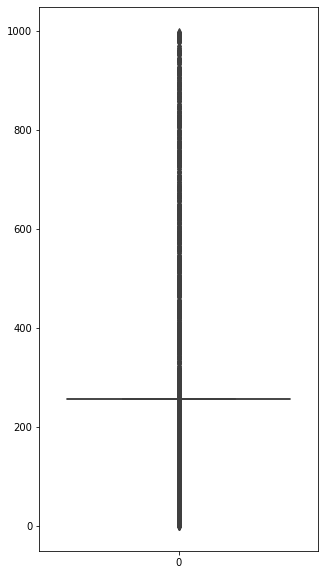

count    4830.000000
mean      257.248240
std       153.373567
min         0.000000
25%       257.000000
50%       257.000000
75%       257.000000
max       999.000000
Name: ratings, dtype: float64


In [59]:
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=data['ratings'])
plt.show()

print(data['ratings'].describe())

- the mean value is also same as median, which suggests that the distribution of the data points is approximately symmetric.
- minimum value in your dataset is 0 and the maximum value is 999, This indicates that there are some extreme values in your dataset that are significantly higher or lower than the majority of the data points.
- These extreme values are also known as outliers.

**Let handle outliers in rating column**

In [60]:
# Calculate the IQR for the ratings column
q1 = data['ratings'].quantile(0.25)
q3 = data['ratings'].quantile(0.75)
iqr = q3 - q1
# Identify potential outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_ratings =data[(data['ratings'] < lower_bound) | (data['ratings'] > upper_bound)].count()
outliers_ratings

book title    1513
ratings       1513
avg_score     1513
author        1513
score         1513
votes         1513
dtype: int64

- 1513 rows having outliers 
- adjusting the outlier with median value


In [61]:
median = np.median(data['ratings'])
data.loc[(data['ratings'] < lower_bound) | (data['ratings'] > upper_bound), 'ratings'] = median

c:\Users\Chandru\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='ratings', ylabel='Count'>

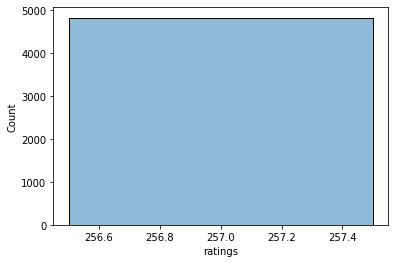

In [62]:
sns.histplot(data=data, x="ratings", kde=True)
sns.kdeplot(data=data, x="ratings")

In [63]:
from scipy.stats import shapiro

# perform Shapiro-Wilk test
stat, p = shapiro(data['ratings'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')


Data looks normally distributed (fail to reject H0)


c:\Users\Chandru\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


**2. Avg_score column**

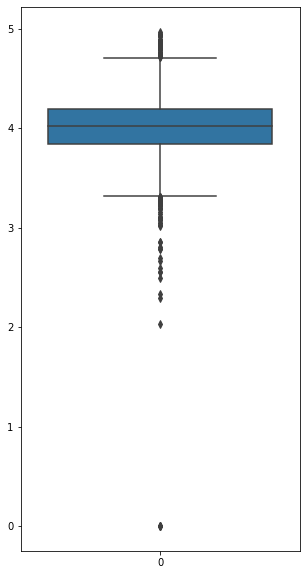

count    4823.000000
mean        4.007643
std         0.311293
min         0.000000
25%         3.840000
50%         4.020000
75%         4.190000
max         4.970000
Name: avg_score, dtype: float64


In [64]:
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=data['avg_score'])
plt.show()

print(data['avg_score'].describe())


**Let handle outliers in avg_score column**

In [66]:
# Calculate the IQR for the votes column
q1 = data['avg_score'].quantile(0.25)
q3 = data['avg_score'].quantile(0.75)
iqr = q3 - q1
# Identify potential outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_avg =data[(data['avg_score'] < lower_bound) | (data['avg_score'] > upper_bound)].count()
outliers_avg

book title    109
ratings       109
avg_score     109
author        109
score         109
votes         109
dtype: int64

- as per abobe desciption the IQR is Q3-Q1 = 4.19-3.84 = 0.35. Therefore, any loer bound value Q1-1.5*IQR = 3.285 or upper bound value Q3+1.5IQR = 4.745 can be considered as outliers.


In [67]:
median = np.median(data['avg_score'])
data.loc[(data['avg_score'] < lower_bound) | (data['avg_score'] > upper_bound), 'avg_score'] = median

<AxesSubplot: xlabel='avg_score', ylabel='Count'>

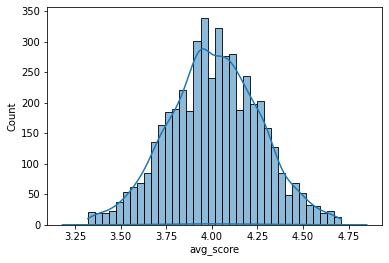

In [68]:
sns.histplot(data=data, x="avg_score", kde=True)
sns.kdeplot(data=data, x="avg_score")

In [69]:
from scipy.stats import shapiro

# perform Shapiro-Wilk test
stat, p = shapiro(data['avg_score'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Data looks normally distributed (fail to reject H0)


**3. votes**

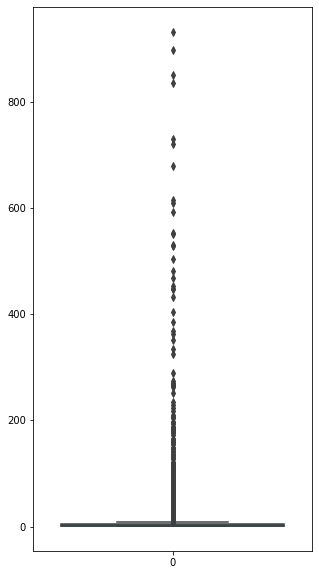

count    4830.000000
mean       10.594410
std        49.073656
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max       932.000000
Name: votes, dtype: float64


In [70]:
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=data['votes'])
plt.show()

print(data['votes'].describe())

**Let handle outliers in votes column**

In [71]:
# Calculate the IQR for the votes column
q1 = data['votes'].quantile(0.25)
q3 = data['votes'].quantile(0.75)
iqr = q3 - q1
# Identify potential outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_votes =data[(data['votes'] < lower_bound) | (data['votes'] > upper_bound)].count()
outliers_votes

book title    688
ratings       688
avg_score     687
author        688
score         688
votes         688
dtype: int64

This code will calculate the IQR for the votes column and then identify any potential outliers that fall below the lower bound or above the upper bound.

In [72]:
median = np.median(data['votes'])
data.loc[(data['votes'] < lower_bound) | (data['votes'] > upper_bound), 'votes'] = median

<AxesSubplot: xlabel='votes', ylabel='Count'>

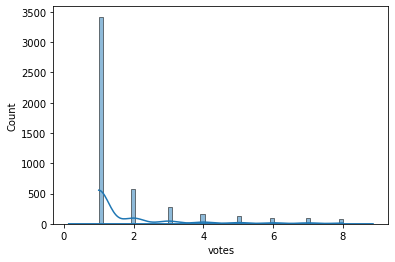

In [73]:
sns.histplot(data=data, x="votes", kde=True)
sns.kdeplot(data=data, x="votes")

In [74]:
from scipy.stats import shapiro

# perform Shapiro-Wilk test
stat, p = shapiro(data['votes'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Data does not look normally distributed (reject H0)


In [75]:
# Perform log transformation on the 'ratings' column
data['votes_log'] = np.log(data['votes'])

# Check if the transformed data is normally distributed using the Shapiro-Wilk test
from scipy.stats import shapiro

stat, p = shapiro(data['votes_log'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Statistics=0.630, p=0.000
Data does not look normally distributed (reject H0)


<AxesSubplot: xlabel='votes_log', ylabel='Count'>

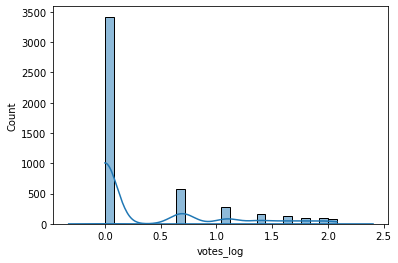

In [76]:
sns.histplot(data=data, x="votes_log", kde=True)
sns.kdeplot(data=data, x="votes_log")

**4. score**

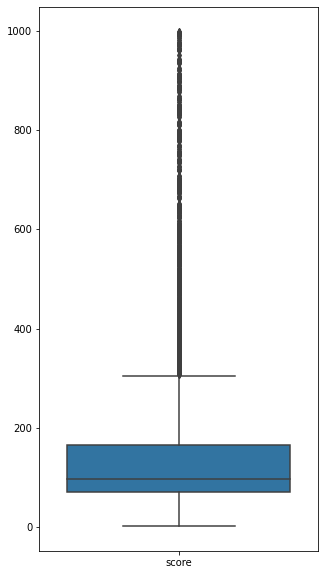

count    4830.00000
mean      154.61470
std       179.33367
min         1.00000
25%        69.00000
50%        96.00000
75%       164.00000
max       999.00000
Name: score, dtype: float64


In [77]:
score=pd.DataFrame(data, columns=['score'])
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=score)
plt.show()
print(data['score'].describe())

**Let handle outliers in score column**

In [78]:
# Calculate the IQR for the votes column
q1 = data['score'].quantile(0.25)
q3 = data['score'].quantile(0.75)
iqr = q3 - q1
# Identify potential outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_score =data[(data['score'] < lower_bound) | (data['score'] > upper_bound)].count()
outliers_score

book title    620
ratings       620
avg_score     617
author        620
score         620
votes         620
votes_log     620
dtype: int64

In [79]:
median = np.median(data['score'])
data.loc[(data['score'] < lower_bound) | (data['score'] > upper_bound), 'score'] = median

In [ ]:
# Perform log transformation on the 'ratings' column
data['votes_log'] = np.log(data['votes'])

# Check if the transformed data is normally distributed using the Shapiro-Wilk test
from scipy.stats import shapiro

stat, p = shapiro(data['votes_log'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

<AxesSubplot: xlabel='score', ylabel='Count'>

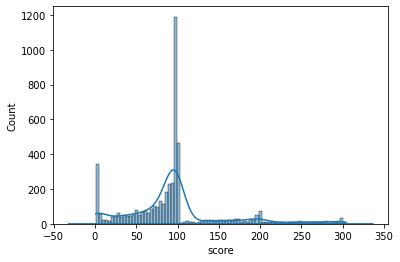

In [80]:
sns.histplot(data=data, x="score", kde=True)
sns.kdeplot(data=data, x="score")

distribution lightly skewded 

In [81]:
from scipy.stats import shapiro

# perform Shapiro-Wilk test
stat, p = shapiro(data['score'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Data does not look normally distributed (reject H0)


data didnot distributed normally,
- let's do log transformation on them

In [82]:
# Perform log transformation on the 'score' column
data['score_log'] = np.log(data['score'])

# Check if the transformed data is normally distributed using the Shapiro-Wilk test
from scipy.stats import shapiro

stat, p = shapiro(data['score_log'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Statistics=0.679, p=0.000
Data does not look normally distributed (reject H0)


<AxesSubplot: xlabel='score', ylabel='Count'>

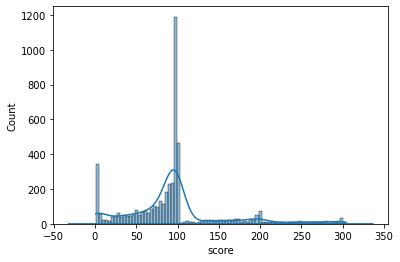

In [88]:
sns.histplot(data=data, x="score", kde=True)
sns.kdeplot(data=data, x="score")

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 0 to 4998
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book title  4830 non-null   object 
 1   ratings     4830 non-null   float64
 2   avg_score   4714 non-null   float64
 3   author      4830 non-null   object 
 4   score       4830 non-null   float64
 5   votes       4830 non-null   float64
 6   votes_log   4830 non-null   float64
 7   score_log   4830 non-null   float64
dtypes: float64(6), object(2)
memory usage: 468.6+ KB


In [90]:
data['avg_score'].isna().sum()

116

In [91]:
data['avg_score'].fillna(data['avg_score'].median(), inplace=True)

In [118]:
data=data.drop(["score_log","votes_log"],axis='columns')

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book title  4830 non-null   object 
 1   ratings     4830 non-null   float64
 2   avg_score   4830 non-null   float64
 3   author      4830 non-null   object 
 4   score       4830 non-null   float64
 5   votes       4830 non-null   float64
dtypes: float64(4), object(2)
memory usage: 393.2+ KB


In [120]:
data.describe()

,ratings,avg_score,score,votes
count,4830.0,4830.000000,4830.000000,4830.000000
mean,257.0,4.013443,95.363354,1.768116
std,0.0,0.248703,59.818628,1.565726
min,257.0,3.320000,1.000000,1.000000
25%,257.0,3.850000,69.000000,1.000000
50%,257.0,4.020000,96.000000,1.000000
75%,257.0,4.180000,100.000000,2.000000
max,257.0,4.710000,304.000000,8.000000


## EDA

In [122]:
data.head(5)

,book title,ratings,avg_score,author,score,votes
0,Pride and Prejudice,257.0,4.28,Jane Austen,237.0,1.0
1,"Fifty Shades of Grey (Fifty Shades, #1)",257.0,3.66,E.L. James,231.0,1.0
2,"Beautiful Disaster (Beautiful, #1)",257.0,4.04,Jamie McGuire,216.0,1.0
3,"Twilight (The Twilight Saga, #1)",257.0,3.64,Stephenie Meyer,138.0,1.0
4,"The Notebook (The Notebook, #1)",257.0,4.14,Nicholas Sparks,98.0,1.0


In [95]:
print("number of author",data.author.nunique())

number of author 2391


In [153]:
print("TOp 10 highest book writers")
print(data['author'].value_counts().head(10))

TOp 10 highest book writers
Nora Roberts        68
Kristen Ashley      34
Lisa Kleypas        31
Suzanne Halliday    30
Ella Fox            26
Julia Quinn         26
Eloisa James        25
Nalini Singh        24
Lora Leigh          20
Julie Garwood       20
Name: author, dtype: int64


In [124]:
dfvalued=data.groupby(['author'])['votes'].sum().reset_index()

dfvalued.sort_values(by="votes",ascending=False).head(10)

,author,votes
1778,Nora Roberts,129.0
1288,Kristen Ashley,91.0
1355,Laurann Dohner,73.0
1722,Nalini Singh,67.0
1445,Lisa Kleypas,57.0
2264,Tessa Dare,55.0
662,Eloisa James,54.0
2038,Sarah J. Maas,53.0
770,Gena Showalter,53.0
772,Georgette Heyer,49.0


In [134]:
# Filter the data to only include books by the Nora Roberts author
author_df = data[data['author'] == 'Nora Roberts'	]
grouped = author_df.groupby('book title')['votes'].sum().reset_index()
sorted_books = grouped.sort_values(by='votes', ascending=False).head(10)
sorted_books

,book title,votes
34,"Key of Valor (Key Trilogy, #3)",7.0
45,River's End,7.0
52,The Heart of Devin MacKade (The MacKade Brothe...,7.0
15,"Daring to Dream (Dream Trilogy, #1)",6.0
61,The Search,6.0
5,"Blue Dahlia (In the Garden, #1)",5.0
33,"Key of Light (Key Trilogy, #1)",5.0
4,"Blood Brothers (Sign of Seven, #1)",5.0
3,"Black Rose (In the Garden, #2)",5.0
7,"Born in Ice (Born In Trilogy, #2)",4.0


In [ ]:
dfvalued=data.groupby(['author'])['votes'].sum().reset_index()

dfvalued.sort_values(by="votes",ascending=False).head(10)

In [139]:
dfvalued=data.groupby(['book title','author'],as_index=False).votes.max()
print("Top 10 books by  votes  ")
dfvalued.sort_values(by="votes",ascending=False).head(10)

Top 10 books by  votes  


,book title,author,votes
4412,"Treading Water (Treading Water, #1)",Marie Force,8.0
981,"Dead and Gone (Sookie Stackhouse, #9)",Charlaine Harris,8.0
2889,"Requiem (Delirium, #3)",Lauren Oliver,8.0
3586,The Champion,Carla Capshaw,8.0
2634,"Origin (Lux, #4)",Jennifer L. Armentrout,8.0
2881,Remembrance,Jude Deveraux,8.0
1001,"Deeper Than Midnight (Midnight Breed, #9)",Lara Adrian,8.0
580,"Born at Midnight (Shadow Falls, #1)",C.C. Hunter,8.0
2878,Remember Me?,Sophie Kinsella,8.0
3752,"The Gravity of Us (Elements, #4)",Brittainy C. Cherry,8.0


In [98]:
dfvalued=data.groupby(['book title','author'],as_index=False).ratings.max()
print("Top 10 books by rating")
dfvalued.sort_values(by="ratings",ascending=False).head(10)

Top 10 books by  rating


,book title,author,ratings
0,"#Hater (Hashtag, #2)",Cambria Hebert,257.0
3226,"Slide (Roads, #1)",Garrett Leigh,257.0
3224,"Sleepless in Scotland (MacLean Curse, #4)",Karen Hawkins,257.0
3223,"Sleeping With the Wolf (After the Crash, #1)",Maddy Barone,257.0
3222,"Slay Me (Rock Gods, #2)",Joanna Blake,257.0
3221,"Slave to Sensation (Psy-Changeling, #1)",Nalini Singh,257.0
3220,"Slave (Finding Anna, #1)",Sherri Hayes,257.0
3219,"Slammed (Slammed, #1)",Colleen Hoover,257.0
3218,"Slade (Walk of Shame, #1)",Victoria Ashley,257.0
3217,"Slade (New Species, #2)",Laurann Dohner,257.0


In [156]:
from tabulate import tabulate
grouped = data.groupby(['book title', 'author']).agg({'ratings': 'mean', 'votes': 'sum', 'avg_score': 'mean'}).reset_index()
sorted_books = grouped.sort_values(by=['ratings', 'votes', 'avg_score'], ascending=False)
top_books= sorted_books.head(10)

print("Top 10 books by ratings, votes, and average score:")
# Print the data as a table using tabulate for better view
print(tabulate(top_books, headers="keys", tablefmt="grid"))

Top 10 books by ratings, votes, and average score:
+------+----------------------------------------------------+------------------------+-----------+---------+-------------+
|      | book title                                         | author                 |   ratings |   votes |   avg_score |
+======+====================================================+========================+===========+=========+=============+
| 1175 | Empire of Storms (Throne of Glass, #5)             | Sarah J. Maas          |       257 |       8 |        4.57 |
+------+----------------------------------------------------+------------------------+-----------+---------+-------------+
| 2930 | Rock Chick Redemption (Rock Chick, #3)             | Kristen Ashley         |       257 |       8 |        4.41 |
+------+----------------------------------------------------+------------------------+-----------+---------+-------------+
|  792 | City of Heavenly Fire (The Mortal Instruments, #6) | Cassandra Clare        |  